In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [25]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [26]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

In [30]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 349us/step - loss: 0.5275 - acc: 0.7755 - val_loss: 0.4104 - val_acc: 0.8663
Epoch 2/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.3221 - acc: 0.8991 - val_loss: 0.3763 - val_acc: 0.8453
Epoch 3/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.2354 - acc: 0.9280 - val_loss: 0.2853 - val_acc: 0.8919
Epoch 4/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1833 - acc: 0.9440 - val_loss: 0.2951 - val_acc: 0.8817
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1467 - acc: 0.9559 - val_loss: 0.2798 - val_acc: 0.8886
Epoch 6/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1220 - acc: 0.9631 - val_loss: 0.2940 - val_acc: 0.8835
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1017 - acc: 0.9706 - val_loss: 0.3239 - 

In [37]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

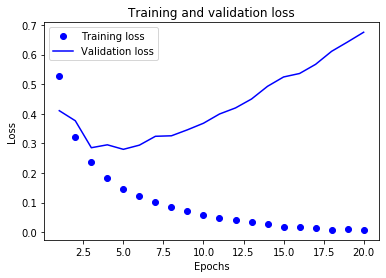

In [38]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

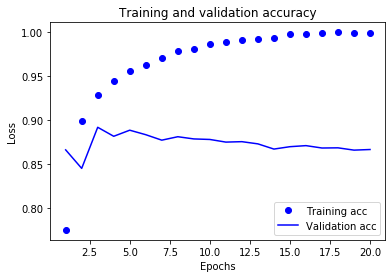

In [41]:
plt.clf()
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [52]:
results

[0.2946671323680878, 0.8841599822044373]

In [53]:
model.predict(x_test)

array([[0.49208036],
       [0.45353436],
       [0.46964666],
       ...,
       [0.49054042],
       [0.4903421 ],
       [0.47164986]], dtype=float32)